In [2]:
# import python packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import interpolate
from scipy import signal
import pylab
from pykalman import KalmanFilter
import time
from sklearn.decomposition import FactorAnalysis
import pickle

In [3]:
# local own implementations
%load_ext autoreload
%autoreload 2
from PLDS_Macke2015 import PLDS, EM
#from PLDS_Macke2015_evaluation import fit_to_all_trials

def standard(x):
    return (x-np.nanmean(x))/np.sqrt(np.nanvar(x))

# simulate data

## simulate LDS latent and PLDS data

(<matplotlib.axes._subplots.AxesSubplot at 0x7f8fea85fd10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f8fc82aec10>)

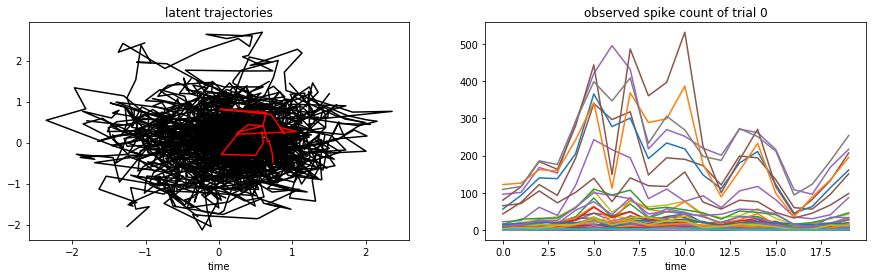

In [4]:
# noise type
poisson = True
#### parameters used ####
seed =1
np.random.seed(seed)
# linear Gaussian
n_step = np.array([20])
Ttrials = 100

# latent
xdim = 2
#A = np.array([[0., 1.],[-4., 0.]]).T* np.array([.5]) # np.array([[0.9, -0.1],  [0.3, 0.7]]) #np.array([[0., 1.],[-4., 0.]])* np.array([.5])#  *  #  
A = 0.9*np.eye(xdim) # np.array([[0.9, 0.1],  [0.3, 0.7]]) #np.array([[0., 1.],[-4., 0.]])* np.array([.5])#  *  #  np.eye(xdim) # 
sigQ = 0.1 #.5
Q = np.eye(xdim)*sigQ # np.array([[1, 0.1],[0.1, 1]]) # 
Q0 = np.eye(xdim)*sigQ
x0 = np.zeros([xdim])+np.random.randn(2)*.1
# observed
ydim = 100
cscal = 2
C = cscal*np.random.rand(ydim*xdim).reshape(ydim, xdim)
R = np.eye(ydim)*.01
# stimulus
sdim = 1
B = cscal*np.ones([ydim,sdim])*np.random.randn(ydim, sdim)
S = np.ones([n_step[0], sdim, Ttrials])
if sdim>1:
    S[:,0,:] = np.round(np.random.rand(n_step[0]*Ttrials)).reshape(n_step[0],Ttrials)
S = np.array(S, dtype='int')

MOD = PLDS(xdim=xdim, ydim=ydim, n_step=n_step, C=C, Q0=Q0, A=A, Q=Q, x0=x0,R=R,
        Ttrials=Ttrials, B=B)
MOD.sample(poisson=poisson, X=S)
MOD.vis_xy()

# inference

In [5]:
ttrial=0
print('test for likelihood function P(y|x)')
MOD.test_log_lik(MOD.x[:MOD.n_step[ttrial],:,ttrial], 
                MOD.y[:MOD.n_step[ttrial],:,ttrial], 
                MOD.B, MOD.C, Rtmp=MOD.R, poisson=poisson, X=S[:MOD.n_step[ttrial],:,ttrial])
MOD.test_J_log_lik(MOD.x[:MOD.n_step[ttrial],:,ttrial],
                MOD.B, MOD.C, Rtmp=MOD.R, poisson=poisson, X=S[:MOD.n_step[ttrial],:,ttrial])
MOD.test_H_log_lik(MOD.x[:MOD.n_step[ttrial],:,ttrial], 
                MOD.B, MOD.C, Rtmp=MOD.R, poisson=poisson, X=S[:MOD.n_step[ttrial],:,ttrial])
print(' ')
print('test for prior function Px)')
MOD.test_log_prior(MOD.x[:MOD.n_step[ttrial],:,ttrial], MOD.A, 
                     MOD.Q, MOD.Q0, MOD.x0)
MOD.test_J_log_prior(MOD.x[:MOD.n_step[ttrial],:,ttrial], MOD.A, 
                     MOD.Q, MOD.Q0, MOD.x0)
MOD.test_H_log_prior(MOD.x[:MOD.n_step[ttrial],:,ttrial], MOD.A, 
                     MOD.Q, MOD.Q0)
print(' ')
print('test for block-list conversion')
MOD.test_block(np.round(MOD.H_log_posterior(MOD.x[:MOD.n_step[ttrial],:,ttrial], MOD.y[:MOD.n_step[ttrial],:,ttrial], MOD.B, MOD.C, MOD.A, MOD.Q, 
              MOD.Q0, MOD.x0, MOD.R, poisson=poisson, X=S[:MOD.n_step[ttrial],:,ttrial])), mdim=[MOD.xdim, MOD.xdim], offdiag=1)

test for likelihood function P(y|x)
----- TEST PASSED -----
----- TEST PASSED -----
----- TEST PASSED -----
 
test for prior function Px)
----- TEST PASSED -----
----- TEST PASSED -----
----- TEST PASSED -----
 
test for block-list conversion
----- TEST PASSED -----


In [6]:
from scipy.optimize import minimize

In [6]:
Xtmp0 = np.sqrt(np.nanvar(MOD.x))*np.random.randn(MOD.x.shape[0], MOD.x.shape[1], MOD.x.shape[2])

Xres = MOD.inference(Xtmp0, MOD.y, MOD.B, MOD.C, MOD.A, MOD.Q, 
              MOD.Q0, MOD.x0, MOD.R, X=S, poisson=poisson, 
              disp=True, xtol=1e-10)



         Current function value: 1021.512958
         Iterations: 5
         Function evaluations: 57
         Gradient evaluations: 51
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 1009.942260
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 14
         Hessian evaluations: 7
Optimization terminated successfully.
         Current function value: 989.353373
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 1010.392323
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 961.344003
         Iterations: 6
         Function evaluations: 9
         Gradient evaluations: 14
         Hessian evaluations: 6
Optimization t

         Current function value: 986.513758
         Iterations: 5
         Function evaluations: 64
         Gradient evaluations: 57
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 985.162510
         Iterations: 6
         Function evaluations: 51
         Gradient evaluations: 54
         Hessian evaluations: 6
         Current function value: 995.381585
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 87
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 958.087729
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 78
         Hessian evaluations: 8
Optimization terminated successfully.
         Current function value: 988.414449
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
Optimization terminated successfully.
         Curre

Optimization terminated successfully.
         Current function value: 1013.016484
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 12
         Hessian evaluations: 6
Optimization terminated successfully.
         Current function value: 965.747738
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 16
         Hessian evaluations: 8
         Current function value: 966.677413
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 15
         Hessian evaluations: 8
         Current function value: 1024.263103
         Iterations: 5
         Function evaluations: 71
         Gradient evaluations: 64
         Hessian evaluations: 6
         Current function value: 968.358699
         Iterations: 5
         Function evaluations: 68
         Gradient evaluations: 61
         Hessian evaluations: 6
         Current function value: 971.882179
         Iterations: 5
         Function evalu

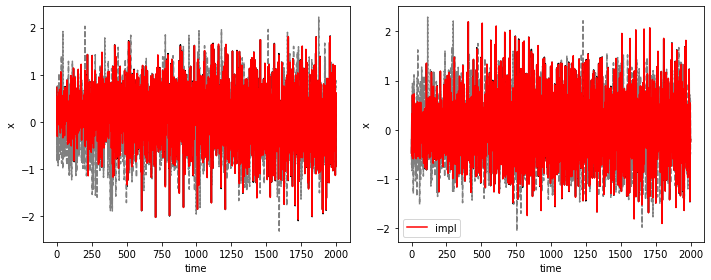

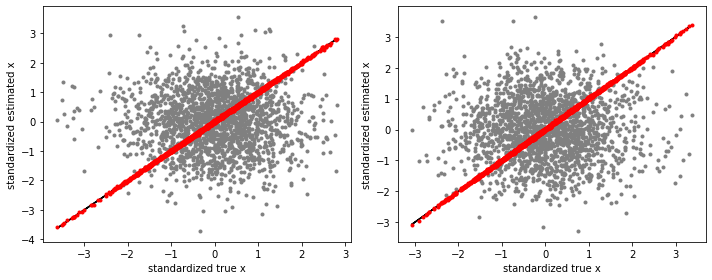

In [7]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
for ff in range(MOD.xdim):
    ax[ff].plot(MOD.x[:,ff,:].ravel(), '-k')
    ax[ff].plot(Xtmp0[:,ff,:].ravel(), '--', color='grey')
    ax[ff].plot(Xres[:,ff,:].ravel(), '-r', label='impl')
    ax[ff].set_xlabel('time')
    ax[ff].set_ylabel('x')
ax[ff].legend()
fig.tight_layout()
fig, ax = plt.subplots(1,2,figsize=(10,4))
for ff in range(MOD.xdim):
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()),
               standard(MOD.x[:,ff,:].ravel()), '-k')
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()),
                standard(Xtmp0[:,ff,:].ravel()),'.', color='grey')
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()), 
                standard(Xres[:,ff,:].ravel()),'r.')
    ax[ff].set_xlabel('standardized true x')
    ax[ff].set_ylabel('standardized estimated x')
fig.tight_layout()

In [8]:
if poisson: 
    R = np.eye(MOD.ydim)*np.sqrt(np.nanvar(MOD.y))
    y = MOD.y.copy()
    y[y<=0] = 1e-10
    y = np.log(y)
else: 
    R = MOD.R.copy()
    y = MOD.y.copy()
Xkal = np.zeros(MOD.x.shape)*np.nan
for ttrial in range(MOD.Ttrials):
    kf = KalmanFilter(n_dim_state=MOD.xdim, n_dim_obs=MOD.ydim,
                     transition_matrices=MOD.A,
                     transition_covariance=MOD.Q,
                     observation_matrices=MOD.C,
                     observation_covariance=R, 
                     initial_state_mean=MOD.x0,
                     initial_state_covariance=MOD.Q0)
    # Kalman filtering
    filtered_state_means, filtered_state_covariances = kf.filter(y[:,:,ttrial])
    # Kalman smoothing
    smoothed_state_means, smoothed_state_covariances = kf.smooth(y[:,:,ttrial])
    Xkal[:,:,ttrial] = smoothed_state_means

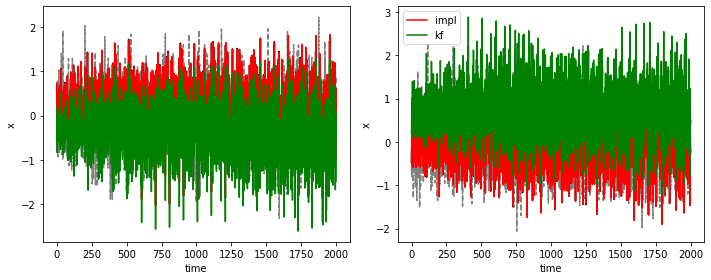

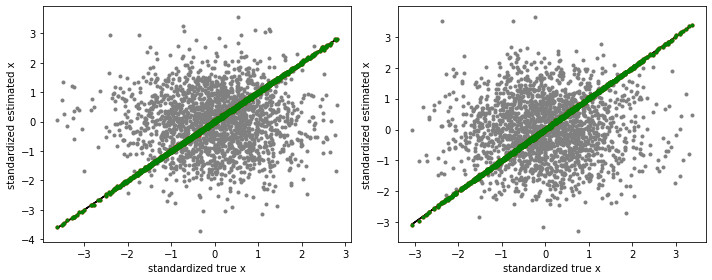

In [9]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
for ff in range(MOD.xdim):
    ax[ff].plot(MOD.x[:,ff,:].ravel(), '-k')
    ax[ff].plot(Xtmp0[:,ff,:].ravel(), '--', color='grey')
    ax[ff].plot(Xres[:,ff,:].ravel(), '-r', label='impl')
    ax[ff].plot(Xkal[:,ff,:].ravel(), '-g', label='kf')
    ax[ff].set_xlabel('time')
    ax[ff].set_ylabel('x')
ax[ff].legend()
fig.tight_layout()
fig, ax = plt.subplots(1,2,figsize=(10,4))
for ff in range(MOD.xdim):
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()),
               standard(MOD.x[:,ff,:].ravel()), '-k')
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()),
                standard(Xtmp0[:,ff,:].ravel()),'.', color='grey')
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()), 
                standard(Xres[:,ff,:].ravel()),'r.')
    ax[ff].plot(standard(MOD.x[:,ff,:].ravel()), 
                standard(Xkal[:,ff,:].ravel()),'g.')
    ax[ff].set_xlabel('standardized true x')
    ax[ff].set_ylabel('standardized estimated x')
fig.tight_layout()

### if y was noiseless (= rate)

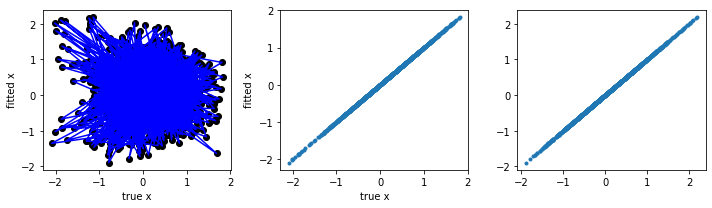

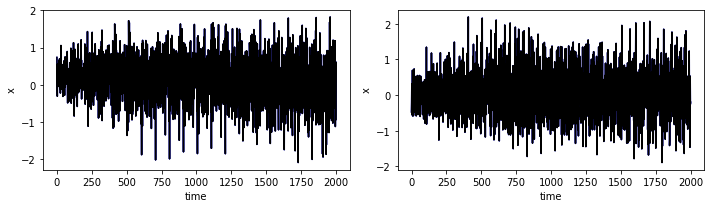

In [10]:
ytmp = np.zeros(MOD.y.shape)
for kk in range(MOD.Ttrials):
    if poisson:
        ytmp[:,:,kk] = np.exp(MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T
    else:
        ytmp[:,:,kk] = (MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T


X0 = np.sqrt(np.nanvar(MOD.x))*np.random.randn(MOD.x.shape[0], MOD.x.shape[1], MOD.x.shape[2])

mu = MOD.inference(X0, ytmp, MOD.B, MOD.C, MOD.A, MOD.Q, 
              MOD.Q0, MOD.x0, MOD.R, X=S, poisson=poisson, 
              disp=False, xtol=1e-10)

#mu, sigma = MOD.E_step(MOD.x,ytmp, MOD.B, MOD.C, MOD.A, MOD.Q, 
#                      MOD.Q0, MOD.x0, MOD.R, X=S,
#                       poisson=poisson, disp=False)
fig, ax = plt.subplots(1,3,figsize=(10,3))
ax[0].plot(MOD.x[:,0,:].ravel(),MOD.x[:,1,:].ravel(), 'ok')
ax[0].plot(mu[:,0,:].ravel(),mu[:,1,:].ravel(), 'b')
ax[0].set_xlabel('x dim 1')
ax[0].set_xlabel('x dim 2')
ax[1].plot(MOD.x[:,0,:].ravel(), mu[:,0,:].ravel(), '.')  
ax[2].plot(MOD.x[:,1,:].ravel(), mu[:,1,:].ravel(), '.')  
for aa in range(2):
    ax[aa].set_xlabel('true x')
    ax[aa].set_ylabel('fitted x')
fig.tight_layout()

fig, ax = plt.subplots(1,2,figsize=(10,3))
ax[0].plot(mu[:,0,:].ravel(), 'b')
ax[0].plot(MOD.x[:,0,:].ravel(), 'k')
ax[1].plot(mu[:,1,:].ravel(), 'b')
ax[1].plot(MOD.x[:,1,:].ravel(), 'k')
for aa in range(2):
    ax[aa].set_xlabel('time')
    ax[aa].set_ylabel('x')
fig.tight_layout()

# learning

In [11]:
# noiseless (xtmp, ytmp) versus with noise MOD.y
mu, sigma = MOD.E_step(MOD.x,MOD.y, MOD.B, MOD.C, MOD.A, MOD.Q, 
                      MOD.Q0, MOD.x0, MOD.R, X=S,
                       poisson=poisson, disp=False)
if poisson: 
    R = np.eye(MOD.ydim)*np.sqrt(np.nanvar(MOD.y))
    y = MOD.y.copy()
    y[y<=0] = 1e-10
    y = np.log(y)
else: 
    R = MOD.R.copy()
    y = MOD.y.copy()

In [12]:
kf = KalmanFilter(n_dim_state=MOD.xdim, n_dim_obs=MOD.ydim,
                 transition_matrices=MOD.A,
                 transition_covariance=MOD.Q,
                 observation_matrices=MOD.C,
                 observation_covariance=R, 
                 #initial_state_mean=MOD.x0,
                 initial_state_covariance=MOD.Q0
                 )
kf.em(y[:,:,0], n_iter=20)
print('x0 from KF: \n', kf.initial_state_mean)
print('x0 from impl: \n', np.round(MOD.upx0(mu),4))
print('true x0: \n', MOD.x0)

x0 from KF: 
 [0.19468427 0.21829105]
x0 from impl: 
 [ 0.243  -0.0461]
true x0: 
 [ 0.16243454 -0.06117564]


In [13]:
kf = KalmanFilter(n_dim_state=MOD.xdim, n_dim_obs=MOD.ydim,
                 transition_matrices=MOD.A,
                 transition_covariance=MOD.Q,
                 observation_matrices=MOD.C,
                 observation_covariance=R, 
                 initial_state_mean=MOD.x0,
                 #initial_state_covariance=MOD.Q0
                 )
kf.em(y[:,:,0], n_iter=20)
print('Q0 from KF: \n', kf.initial_state_covariance)
print('Q0 from impl: \n', np.round(MOD.upQ0(MOD.x0, mu, [sigma[kk][0][0] for kk in range(MOD.Ttrials)]),4))
print('true Q0: \n', MOD.Q0)

Q0 from KF: 
 [[ 6.03752255e-06 -4.11411438e-06]
 [-4.11411438e-06  5.17004122e-06]]
Q0 from impl: 
 [[0.0911 0.0065]
 [0.0065 0.1163]]
true Q0: 
 [[0.1 0. ]
 [0.  0.1]]


In [14]:
if poisson: R = np.eye(MOD.ydim)*np.sqrt(np.nanvar(MOD.y))
else: R = MOD.R.copy()
kf = KalmanFilter(n_dim_state=MOD.xdim, n_dim_obs=MOD.ydim,
                 transition_matrices=MOD.A,
                 #transition_covariance=MOD.Q,
                 observation_matrices=MOD.C,
                 observation_covariance=R, 
                 initial_state_mean=MOD.x0,
                 initial_state_covariance=MOD.Q0)
kf.em(y[:,:,0], n_iter=20)
print('Q from KF: \n', kf.transition_covariance)
print('Q from impl: \n', np.round(MOD.upQ(MOD.A, mu, sigma),6))
print('true Q: \n', MOD.Q)

Q from KF: 
 [[0.07747734 0.01862547]
 [0.01862547 0.08062425]]
Q from impl: 
 [[ 0.004525 -0.000491]
 [-0.000491  0.004645]]
true Q: 
 [[0.1 0. ]
 [0.  0.1]]


In [15]:
if poisson: R = np.eye(MOD.ydim)*np.sqrt(np.nanvar(MOD.y))
else: R = MOD.R.copy()
kf = KalmanFilter(n_dim_state=MOD.xdim, n_dim_obs=MOD.ydim,
                 #transition_matrices=MOD.A,
                 transition_covariance=MOD.Q,
                 observation_matrices=MOD.C,
                 observation_covariance=R, 
                 initial_state_mean=MOD.x0,
                 initial_state_covariance=MOD.Q0)
kf.em(y[:,:,0], n_iter=20)
print('A from KF: \n', kf.transition_matrices)
print('A from impl: \n', np.round(MOD.upA(mu, sigma),3))
print('true A: \n', MOD.A)

A from KF: 
 [[1. 0.]
 [0. 1.]]
A from impl: 
 [[ 0.893 -0.006]
 [-0.001  0.897]]
true A: 
 [[0.9 0. ]
 [0.  0.9]]


### parameters of observation mode
--> not implemented yet for gaussian noise

In [93]:
# noiseless (xtmp, ytmp) versus with noise
mu, sigma = MOD.E_step(MOD.x,MOD.y, MOD.B, MOD.C, MOD.A, MOD.Q, 
                      MOD.Q0, MOD.x0, MOD.R, X=S,
                       poisson=poisson, disp=False)

In [94]:
print(MOD.L_dyn(MOD.x, mu, sigma, MOD.x0, MOD.Q0))
print(MOD.L_dyn(np.random.randn(MOD.x.shape[0], MOD.x.shape[1], MOD.x.shape[2]),
          mu, sigma, MOD.x0, MOD.Q0))

-361339.3909011914

B closed form solution


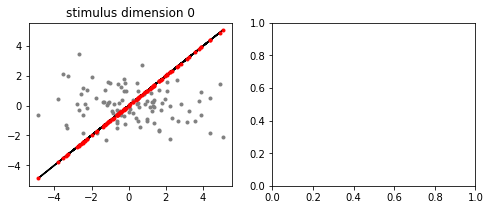

In [29]:
B0 = np.random.randn(MOD.B.shape[0], MOD.B.shape[1])
Best = MOD.upB(B0, MOD.C, MOD.y, mu, sigma, X=S, Rtmp=MOD.R,
             disp=True, gtol=1e-02, maxiter=10, poisson=poisson)
fig, ax = plt.subplots(1,np.max([2,MOD.B.shape[1]]),figsize=(8,3))
for bb in range(MOD.B.shape[1]):
    ax[bb].plot(MOD.B[:,bb], MOD.B[:,bb], '-k')
    ax[bb].plot(MOD.B[:,bb], B0[:,bb], '.', color='grey')
    ax[bb].plot(MOD.B[:,bb], Best[:,bb], '.r')
    ax[bb].set_title('stimulus dimension '+np.str(bb))

In [ ]:
# below --> trying to make numerical approx of C work 
# with gaussian observation noise

In [50]:
C0 = np.random.randn(MOD.ydim, MOD.xdim)
Cest = MOD.upC(C0, MOD.B, MOD.y, mu, sigma, X=S, Rtmp=MOD.R,
        disp=True, gtol=1e-5, maxiter=10, poisson=poisson)

         Current function value: 195032.821595
         Iterations: 100
         Function evaluations: 281
         Gradient evaluations: 281


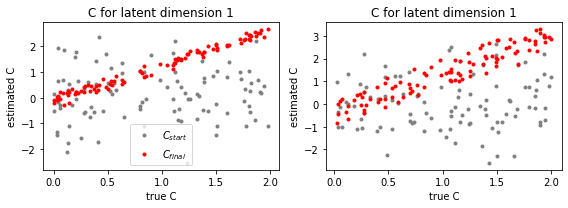

In [55]:
fig, ax = plt.subplots(1,2,figsize=(8,3))
for xx in range(2):
    ax[xx].plot(MOD.C[:,xx], C0[:,xx], '.', color='grey', label='$C_{start}$')
    ax[xx].plot(MOD.C[:,xx], Cest[:,xx], '.r', label='$C_{final}$')
    ax[xx].set_title('C for latent dimension '+np.str(bb+1))
    ax[xx].set_xlabel('true C')
    ax[xx].set_ylabel('estimated C')
ax[0].legend()
fig.tight_layout()

### test: gradient of neg lower bound given noiseless data

using noiseless y:

neg lower bound given random C:  26479730.979989838
neg lower bound given true C:  2023.170980357469


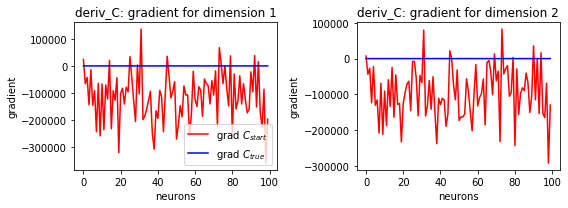

In [56]:
ytmp = np.zeros(MOD.y.shape)
for kk in range(MOD.Ttrials):
    if poisson:
        ytmp[:,:,kk] = np.exp(MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T
    else:
        ytmp[:,:,kk] = (MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T
mu, sigma = MOD.E_step(MOD.x,MOD.y, MOD.B, MOD.C, MOD.A, MOD.Q, 
                      MOD.Q0, MOD.x0, MOD.R, X=S,
                       poisson=poisson, disp=False)
print('using noiseless y:\n')
print('neg lower bound given random C: ', MOD.L_obs(C0, MOD.B, ytmp, mu, sigma, X=S,Rtmp=MOD.R, poisson=poisson))
print('neg lower bound given true C: ',MOD.L_obs(MOD.C, MOD.B, ytmp, mu, sigma, X=S,Rtmp=MOD.R, poisson=poisson))
fig, ax = plt.subplots(1,2,figsize=(8,3))
for xx in range(2):
    ax[xx].plot(MOD.J_L_obs_C(C0, MOD.B, ytmp, mu, sigma, X=S,Rtmp=MOD.R, poisson=poisson)[:,xx], 'r', label='grad $C_{start}$')
    ax[xx].plot(MOD.J_L_obs_C(MOD.C, MOD.B, ytmp, mu, sigma, X=S,Rtmp=MOD.R, poisson=poisson)[:,xx],'b', label='grad $C_{true}$')
    ax[xx].set_title('deriv_C: gradient for dimension '+np.str(xx+1))
    ax[xx].set_xlabel('neurons')
    ax[xx].set_ylabel('gradient')
ax[0].legend()
fig.tight_layout()

using noiseless y:

neg lower bound given random B:  121369313.31027494
neg lower bound given true B:  2023.170980357469


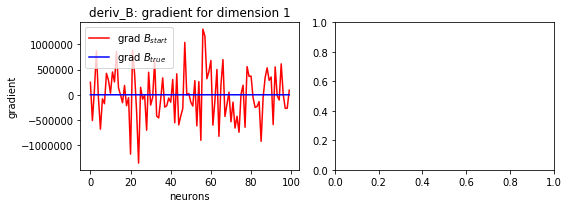

In [57]:
ytmp = np.zeros(MOD.y.shape)
for kk in range(MOD.Ttrials):
    if poisson:
        ytmp[:,:,kk] = np.exp(MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T
    else:
        ytmp[:,:,kk] = (MOD.C.dot(MOD.x[:,:,kk].T)+MOD.B.dot(S[:,:,kk].T)).T
mu, sigma = MOD.E_step(MOD.x,MOD.y, MOD.B, MOD.C, MOD.A, MOD.Q, 
                      MOD.Q0, MOD.x0, MOD.R, X=S,
                       poisson=poisson, disp=False)
print('using noiseless y:\n')
print('neg lower bound given random B: ', MOD.L_obs(MOD.C, B0, ytmp, mu, sigma, X=S, Rtmp=MOD.R, poisson=poisson))
print('neg lower bound given true B: ',MOD.L_obs(MOD.C, MOD.B, ytmp, mu, sigma, X=S, Rtmp=MOD.R, poisson=poisson))
fig, ax = plt.subplots(1,2,figsize=(8,3))
for xx in range(S.shape[1]):
    ax[xx].plot(MOD.J_L_obs_B(MOD.C, B0, ytmp, mu, sigma, X=S, Rtmp=MOD.R, poisson=poisson)[:,xx], 'r', label='grad $B_{start}$')
    ax[xx].plot(MOD.J_L_obs_B(MOD.C, MOD.B, ytmp, mu, sigma, X=S, Rtmp=MOD.R, poisson=poisson)[:,xx],'b', label='grad $B_{true}$')
    ax[xx].set_title('deriv_B: gradient for dimension '+np.str(xx+1))
    ax[xx].set_xlabel('neurons')
    ax[xx].set_ylabel('gradient')
ax[0].legend()
fig.tight_layout()

# full EM fitting

In [7]:
fit = EM(maxiter=50, gtol=1e-03)
MOD0 = fit.fit(MOD.y, MOD.xdim, poisson, seed=0, S=S, maxiterem=10)

--- iter 0 ---
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
numerical error in exponential
   lower bound at start  -1542024.4894780922
B closed form solution
   lower bound after iteration  0 :  -16796679.305842545
time needed:  12.170376062393188
--- iter 1 ---
B closed form solution
   lower bound after iteration  1 :  -19121636.592232246
time needed:  12.218412637710571
--- iter 2 ---
B closed form solution
   lower bound after iteration  2 :  -19265049.056530077
time needed:  12.983350038528442
--- iter 3 ---
B closed form solution
   lower bound after iteration  3 :  -19296929.726839844
time needed:  12.808154106140137
--- iter 4 ---
B closed form solution
  

In [8]:
def print_par(MOD, obs=False):
    print('---- latent var parameters ------')
    print('A: ', np.linalg.eigvals(MOD.A))
    print('Q: ', np.linalg.eigvals(MOD.Q))
    print('---- prior parameters -----------')
    print('x0: ', MOD.x0)
    print('Q0: ', np.linalg.eigvals(MOD.Q0))
    if obs:
        print('---- observed var parameters ----')
        print('C: ', MOD.C)
        print('B: ', MOD.B)
    print(' ')

In [9]:
print_par(MOD)
print_par(MOD0)

---- latent var parameters ------
A:  [0.9 0.9]
Q:  [0.1 0.1]
---- prior parameters -----------
x0:  [ 0.16243454 -0.06117564]
Q0:  [0.1 0.1]
 
---- latent var parameters ------
A:  [1.00793689 0.95299079]
Q:  [1.76262474e-05 4.74669374e-03]
---- prior parameters -----------
x0:  [0.02670627 0.2292754 ]
Q0:  [0.06941281 0.16768   ]
 


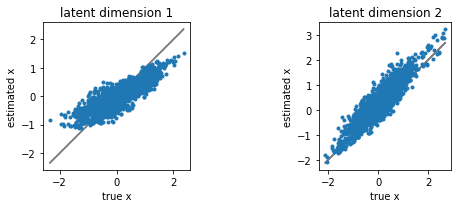

In [10]:
fig, ax = plt.subplots(1,np.max([MOD.xdim,2]), figsize=(8,3))
#X0 = np.random.randn(np.max(MOD0.n_step), MOD0.xdim, MOD0.Ttrials)
mu, sigma = MOD0.E_step(MOD.x, MOD.y, MOD0.B, MOD0.C, MOD0.A, MOD0.Q,
                                   MOD0.Q0, MOD0.x0, MOD0.R, X=S,
                                   poisson=poisson, disp=False)
for aa in range(len(ax)):
    ax[aa].plot(MOD.x[:,aa,:].ravel(), MOD.x[:,aa,:].ravel(),'-', color='grey')
    ax[aa].plot(MOD.x[:,aa,:].ravel(), mu[:,aa,:].ravel(),'.')
    ax[aa].set_xlabel('true x')
    ax[aa].set_ylabel('estimated x')
    ax[aa].set_title('latent dimension '+np.str(aa+1)) 
    ax[aa].set_aspect(1)
fig.tight_layout()

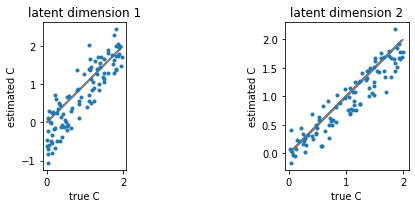

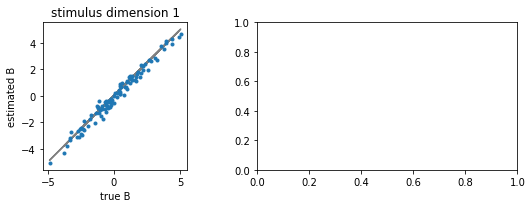

In [11]:
fig, ax = plt.subplots(1,np.max([MOD.xdim,2]), figsize=(8,3))
for aa in range(MOD.xdim):
    ax[aa].plot(MOD.C[:,aa], MOD.C[:,aa],'-', color='grey')
    ax[aa].plot(MOD.C[:,aa], MOD0.C[:,aa],'.')
    ax[aa].set_xlabel('true C')
    ax[aa].set_ylabel('estimated C')
    ax[aa].set_title('latent dimension '+np.str(aa+1)) 
    ax[aa].set_aspect(1)
fig.tight_layout()
fig, ax = plt.subplots(1,np.max([sdim,2]), figsize=(8,3))
for aa in range(sdim):
    ax[aa].plot(MOD.B[:,aa], MOD.B[:,aa],'-', color='grey')
    ax[aa].plot(MOD.B[:,aa], MOD0.B[:,aa],'.')
    ax[aa].set_xlabel('true B')
    ax[aa].set_ylabel('estimated B')
    ax[aa].set_title('stimulus dimension '+np.str(aa+1)) 
    ax[aa].set_aspect(1)
fig.tight_layout()

# todo
- implement gaussian observation noise in the exact same way
- Hessian for C and B optimization?
- ask Cristina
    - update of B: possible analytically or only via likelihood maximization
    - Q and Q0 always sytematically too small, why?
    - check if derivative of L_obs for C in gaussian case is correct

# other stuff

In [ ]:
# find an oscillating system by fitting a kalman filter to it.... never worked

In [415]:

latent = np.array([np.sin(2*np.pi*np.linspace(0,2,500)),
                  np.sin(2*np.pi*np.linspace(0,2,500))]).T+\
        np.random.randn(500,2)*.1
C = np.random.randn(latent.shape[1],3)
data = latent.dot(C)+np.random.randn(latent.shape[0],C.shape[1])

kf = KalmanFilter(n_dim_state=latent.shape[1], n_dim_obs=data.shape[1],
                 observation_matrices=C.T,
                 observation_covariance=np.eye(data.shape[1]))
kf.em(data, n_iter=20, em_vars=('transition_matrices'))
# Kalman filtering
filtered_state_means, filtered_state_covariances = kf.filter(data)
# Kalman smoothing
smoothed_state_means, smoothed_state_covariances = kf.smooth(data)


In [416]:
print(latent.shape)
print(data.shape)

(500, 2)
(500, 3)


In [417]:
MOD = PLDS()
MOD.par(xdim=latent.shape[1], ydim=data.shape[1], n_step=[data.shape[0]],
        C=C, Q0=Q0, A=A, Q=Q, x0=x0, 
        R=np.eye(ydim)*.1,
        Ttrials=1, B=B)

mu, sigma = MOD.E_step(latent.reshape(latent.shape[0], latent.shape[1],1), 
           data.reshape(latent.shape[0], data.shape[1],1), 
          Btmp = np.zeros([data.shape[1], 1]), Ctmp = C.T, Atmp=np.eye(latent.shape[1]),
          Qtmp=np.eye(latent.shape[1])*.1, Q0tmp=np.eye(latent.shape[1])*.1, x0tmp=np.zeros(latent.shape[1]))

         Current function value: -806991.558800
         Iterations: 35
         Function evaluations: 60
         Gradient evaluations: 84
         Hessian evaluations: 36


[[ 1.01755174 -0.0101588 ]
 [ 0.03111849  0.98218728]]
[0.99986951+0.00186149j 0.99986951-0.00186149j]


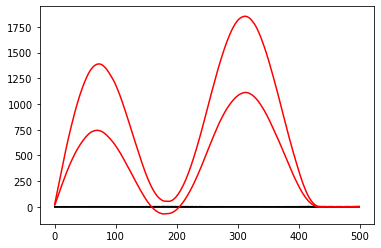

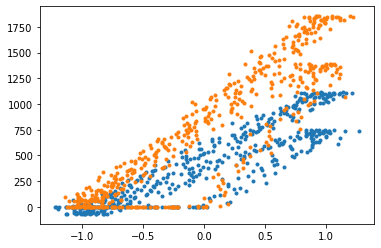

In [418]:
Aest = MOD.upA(mu, sigma)
print(Aest)
print(np.linalg.eigvals(Aest))
plt.figure()
plt.plot(data[:,:3], '-', color='grey')
plt.plot(latent, 'k')
plt.plot(mu[:,:,0], 'r')
plt.figure()
plt.plot(latent,mu[:,:,0], '.')


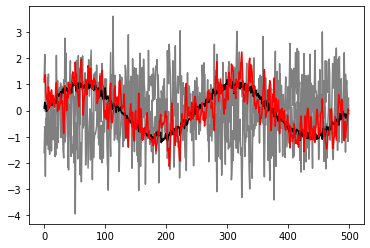

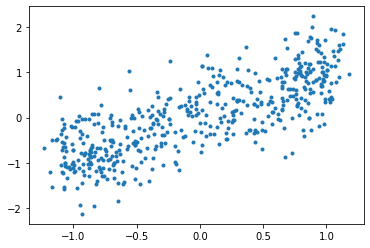

In [386]:
plt.figure()
plt.plot(data[:,:3], '-', color='grey')
plt.plot(latent, 'k')
plt.plot(smoothed_state_means, 'r')
plt.figure()
plt.plot(latent,smoothed_state_means, '.')


In [387]:
print(kf.transition_matrices)
print(kf.transition_covariance)

[[1.]]
[[1.]]
